In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pickle

In [6]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path).convert('L')
        img = img.resize((32, 32))
        img_array = np.array(img) / 255.0
        images.append(img_array)
        labels.append(label)
    return images, labels

In [3]:
def load_dataset(base_path):
    X_train, y_train = [], []
    X_val, y_val = [], []

    for dataset in ['train_bak', 'val']:
        for label in ['PNEUMONIA', 'NORMAL']:
            folder = os.path.join(base_path, dataset, label)
            images, labels = load_images_from_folder(folder, label)
            if dataset == 'train_bak':
                X_train.extend(images)
                y_train.extend(labels)
            elif dataset == 'val':
                X_val.extend(images)
                y_val.extend(labels)
            # elif dataset == 'test':
            #     X_test.extend(images)
            #     y_test.extend(labels)

    return (np.array(X_train), np.array(y_train),
            np.array(X_val), np.array(y_val))

In [7]:
base_path = './datasets/'
X_train, y_train, X_val, y_val = load_dataset(base_path)

In [5]:
print(f'Number of images in dataset: {len(X_train)}')
print(f'Shape of X_train: {np.shape(X_train)}')

Number of images in dataset: 5840
Shape of X_train: (5840, 32, 32)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [7]:
print(f'Number of images in train split: {len(X_train)}')
print(f'Number of images in test split: {len(X_test)}')

Number of images in train split: 4672
Number of images in test split: 1168


In [8]:
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))

In [9]:
X_train = X_train[:3500]
y_train = y_train[:3500]

In [10]:
knn = KNeighborsClassifier(n_neighbors=4, algorithm='ball_tree', weights='uniform')
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=4)

In [11]:
pickle.dump(knn, open("knn.pkl", 'wb'))

In [12]:
print(f'Number of images in dataset: {len(X_test)}')
print(f'Shape of X_test: {np.shape(X_test)}')

Number of images in dataset: 1168
Shape of X_test: (1168, 32, 32)


In [13]:
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))

In [15]:
y_pred = knn.predict(X_test)
y_acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Test Accuracy: {y_acc * 100:.2f}%')

Test Accuracy: 92.81%


In [16]:
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 

In [17]:
y_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
print(y_matrix)

[[266  42]
 [ 42 818]]


In [18]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

      NORMAL       0.86      0.86      0.86       308
   PNEUMONIA       0.95      0.95      0.95       860

    accuracy                           0.93      1168
   macro avg       0.91      0.91      0.91      1168
weighted avg       0.93      0.93      0.93      1168



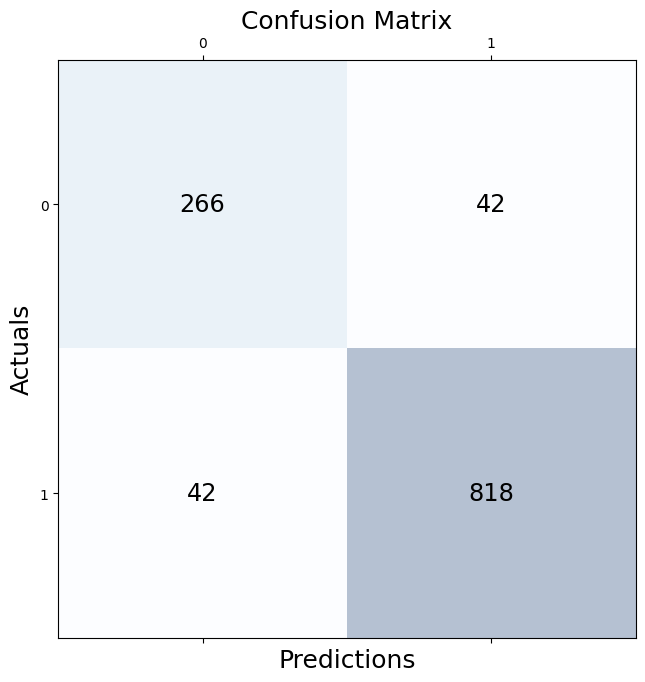

In [19]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(y_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(y_matrix.shape[0]):
    for j in range(y_matrix.shape[1]):
        ax.text(x=j, y=i,s=y_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [20]:
y_test_processed = [0 if label == 'NORMAL' else 1 for label in y_test]

y_pred_processed = [0 if label == 'NORMAL' else 1 for label in y_pred]

fpr, tpr, _ = metrics.roc_curve(y_true=y_test_processed, y_score=y_pred_processed, pos_label=1)

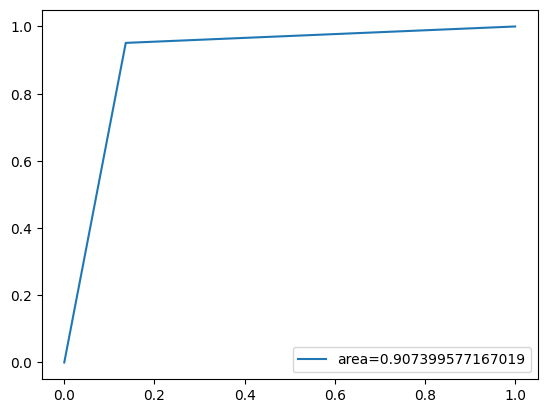

In [21]:
auc = metrics.roc_auc_score(y_true=y_test_processed, y_score=y_pred_processed)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [22]:
nsamples, nx, ny = X_val.shape
X_val = X_val.reshape((nsamples,nx*ny))

In [23]:
X_val, _, y_val, _ = train_test_split(X_val, y_val, test_size=0.01, random_state=42)

In [24]:
y_val_pred = knn.predict(X_val)
val_accuracy = accuracy_score(y_true=y_val, y_pred=y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

Validation Accuracy: 80.00%


In [25]:
print(classification_report(y_true=y_val, y_pred=y_val_pred))

              precision    recall  f1-score   support

      NORMAL       1.00      0.62      0.77         8
   PNEUMONIA       0.70      1.00      0.82         7

    accuracy                           0.80        15
   macro avg       0.85      0.81      0.80        15
weighted avg       0.86      0.80      0.79        15



In [509]:
n = 1
best_score = 0
best_n = 1
while(n < 11):
    knn = KNeighborsClassifier(n_neighbors=n, algorithm='ball_tree', weights='uniform')
    knn.fit(X=X_train, y=y_train)
    print(f'N = {n}')
    print('================')
    print('Test split prediction')
    y_pred = knn.predict(X_test)
    y_acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    print(f'Test Accuracy: {y_acc * 100:.2f}%')
    print('================')
    print('Val split prediction')
    y_val_pred = knn.predict(X_val)
    val_accuracy = accuracy_score(y_true=y_val, y_pred=y_val_pred)
    print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')
    print('================')
    print('================')
    if(best_score < val_accuracy) : 
        best_score = val_accuracy
        best_n = n
    n += 1

print(f'Best N for n_neighbor parameter: {best_n} with {best_score * 100:.2f}%')

N = 1
Test split prediction
Test Accuracy: 92.47%
Val split prediction
Validation Accuracy: 53.33%
N = 2
Test split prediction
Test Accuracy: 90.41%
Val split prediction
Validation Accuracy: 60.00%
N = 3
Test split prediction
Test Accuracy: 92.98%
Val split prediction
Validation Accuracy: 60.00%
N = 4
Test split prediction
Test Accuracy: 92.81%
Val split prediction
Validation Accuracy: 80.00%
N = 5
Test split prediction
Test Accuracy: 92.98%
Val split prediction
Validation Accuracy: 60.00%
N = 6
Test split prediction
Test Accuracy: 92.64%
Val split prediction
Validation Accuracy: 60.00%
N = 7
Test split prediction
Test Accuracy: 92.98%
Val split prediction
Validation Accuracy: 53.33%
N = 8
Test split prediction
Test Accuracy: 92.89%
Val split prediction
Validation Accuracy: 53.33%
N = 9
Test split prediction
Test Accuracy: 92.47%
Val split prediction
Validation Accuracy: 46.67%
N = 10
Test split prediction
Test Accuracy: 92.98%
Val split prediction
Validation Accuracy: 53.33%
Best N fo

In [26]:
val_matrix = metrics.confusion_matrix(y_val, y_val_pred)
val_matrix

array([[5, 3],
       [0, 7]])

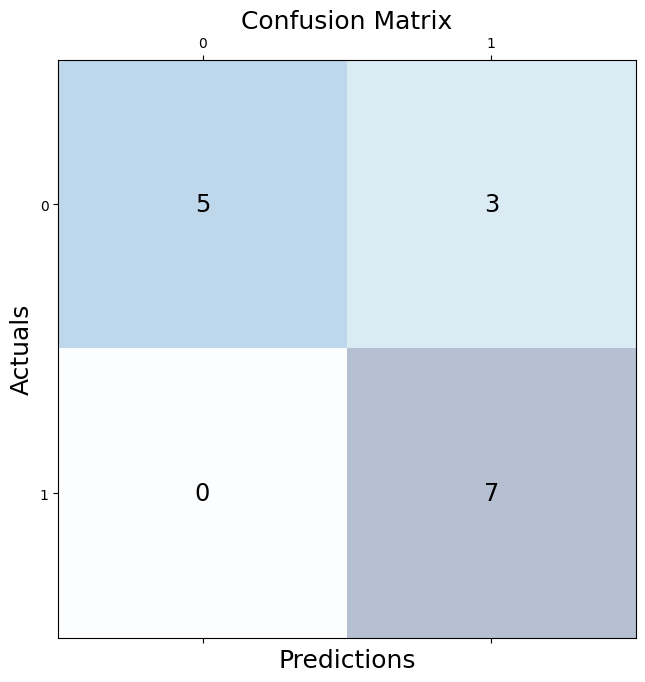

In [27]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(val_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(val_matrix.shape[0]):
    for j in range(val_matrix.shape[1]):
        ax.text(x=j, y=i,s=val_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [28]:
y_val_processed = [0 if label == 'NORMAL' else 1 for label in y_val]

y_predicted_processed = [0 if label == 'NORMAL' else 1 for label in y_val_pred]

fpr, tpr, _ = metrics.roc_curve(y_true=y_val_processed, y_score=y_predicted_processed, pos_label=1)

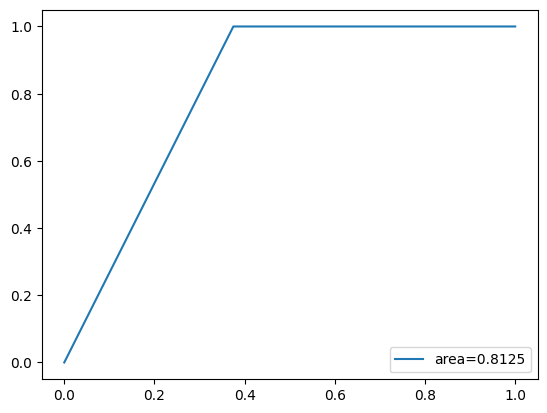

In [29]:
auc = metrics.roc_auc_score(y_true=y_val_processed, y_score=y_predicted_processed)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)

In [277]:
from sklearn.model_selection import GridSearchCV

In [351]:

n_neighbors = list(range(1,11))
parameters = dict(n_neighbors=n_neighbors)
grid = GridSearchCV(knn, parameters, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

grid_search=grid.fit(X=X_train, y=y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/Users/gurkan/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [352]:
print(grid_search.best_params_)
# {'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 10, 'weights': 'distance'}
# {'algorithm': 'ball_tree', 'leaf_size': 25, 'n_neighbors': 10, 'weights': 'distance'}
# {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 10, 'weights': 'distance'}
# {'algorithm': 'ball_tree', 'leaf_size': 15, 'n_neighbors': 10, 'weights': 'distance'}
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'n_neighbors': 4}
Accuracy for our training dataset with tuning is : 85.00%
